Complete the exercises below For **Assignment #3**.

## Linear model with one numerical variable

Execute the following cell to load the [ISLR2](https://cran.rstudio.com/web/packages/ISLR2/index.html) and [Tidverse](https://www.tidyverse.org/) packages.

In [1]:
library('tidyverse')
library('ISLR2')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `ISLR2` package provides a dataset called `Boston` that we will use in this assignment.

In [12]:
Boston |> head()
Boston |> glimpse()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


Rows: 506
Columns: 13
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ lstat   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 17.10…
$ medv    <dbl> 24

🚨 Use the **Jupyter Lab Contextual Help Feature** to see the documentation for this data. 

In [3]:
help(Boston)

Boston                  package:ISLR2                  R Documentation

_B_o_s_t_o_n _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     A data set containing housing values in 506 suburbs of Boston.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     A data frame with 506 rows and 13 variables.

     'crim' per capita crime rate by town.

     'zn' proportion of residential land zoned for lots over 25,000
          sq.ft.

     'indus' proportion of non-retail business acres per town.

     'chas' Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     'nox' nitrogen oxides concentration (parts per 10 million).

     'rm' average number of rooms per dwelling.

     'age' proportion of owner-occupied units built prior to 1940.

     'dis' weighted mean of distances to five Boston employment
          centres.

     'rad' index of accessibility to radial highways.

     'tax' full-value property-tax rate per $10,000.

     'ptratio' pup

❓ **In the markdown cell below, add definitions for the `lstat` and `medv` variables in the `Boston` data.** 

- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in $1000s.

Let's plot `medv` (y-axis) versus `lstat`.

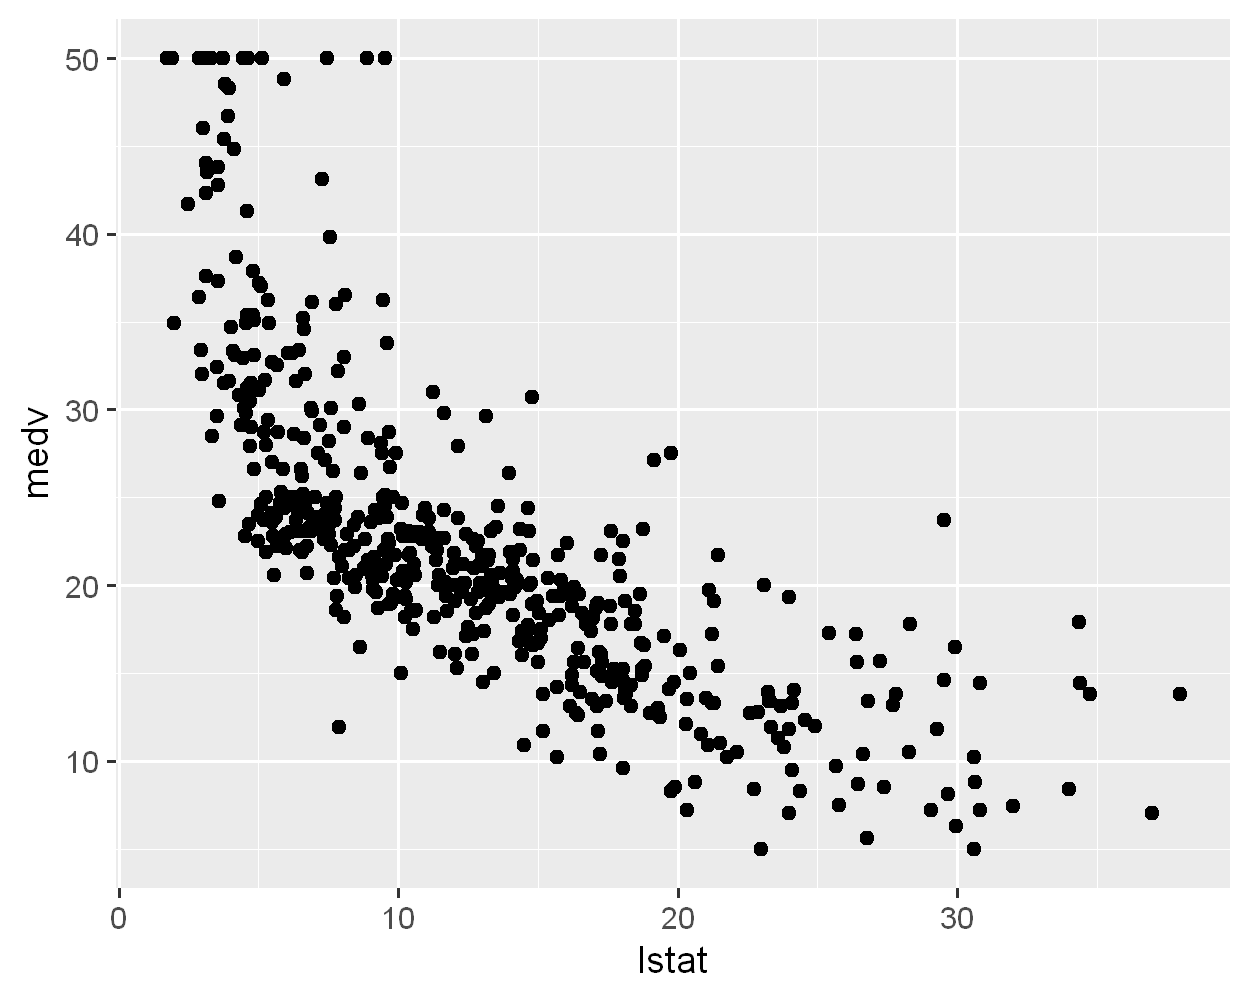

In [4]:
p = ggplot(Boston, aes(x = lstat, y = medv)) + geom_point()

p

❓Does the relationship appear to be positive or negative? Does it look to be reasonably linear?

**Answer:**

The relationship appears to be **negative** in nature, however, it does not appear linear at first glance. I would argue this is more reasonably **exponential decay**, but this depends on whether the behavior we see at high `lstat`or `medv` values are outliers since they seem linearly corelated where the data is most clustered. 

Essentially, a linear fit here should be '*good enough*'. 

***
### Let's build a model!

We need to first load the [Tidymodels]() package.

In [5]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



First we specify our model as `linear regression` using the `lm` engine.

In [7]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


Next we "fit" our model by supplying the `formula` and the data.

In [15]:
mod_fit = mod |> fit(medv ~ lstat, data = Boston)

mod_fit

parsnip model object


Call:
stats::lm(formula = medv ~ lstat, data = data)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


### Get the regression table

In [16]:
# We can use the tidy function to get a table of our model information
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.5538409,0.56262735,61.41515,3.743081e-236
lstat,-0.9500494,0.03873342,-24.52790,5.081103e-88


❓Comparing on the chart above and the regression table, does the **sign** of the `estimate` for the `lstat` term coefficient fit your expectations?

**Answer:**

Yes. We expect there to be a `negative` linear coorelation with a positive y-intercept.

***
### Making predictions and visualizing the model

We can use the `augment` function to "predict" `medv` for all the values in our original dataset. We will capture these predictions in a new data frame called `Boston2`. The predicted values are found in the `.pred` column.

In [17]:
Boston2 = augment(mod_fit, Boston)

glimpse(Boston2)

Rows: 506
Columns: 15
$ .pred   <dbl> 29.822595, 25.870390, 30.725142, 31.760696, 29.490078, 29.6040…
$ .resid  <dbl> -5.8225951, -4.2703898, 3.9748580, 1.6393042, 6.7099222, -0.90…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

Let's visualize our model.

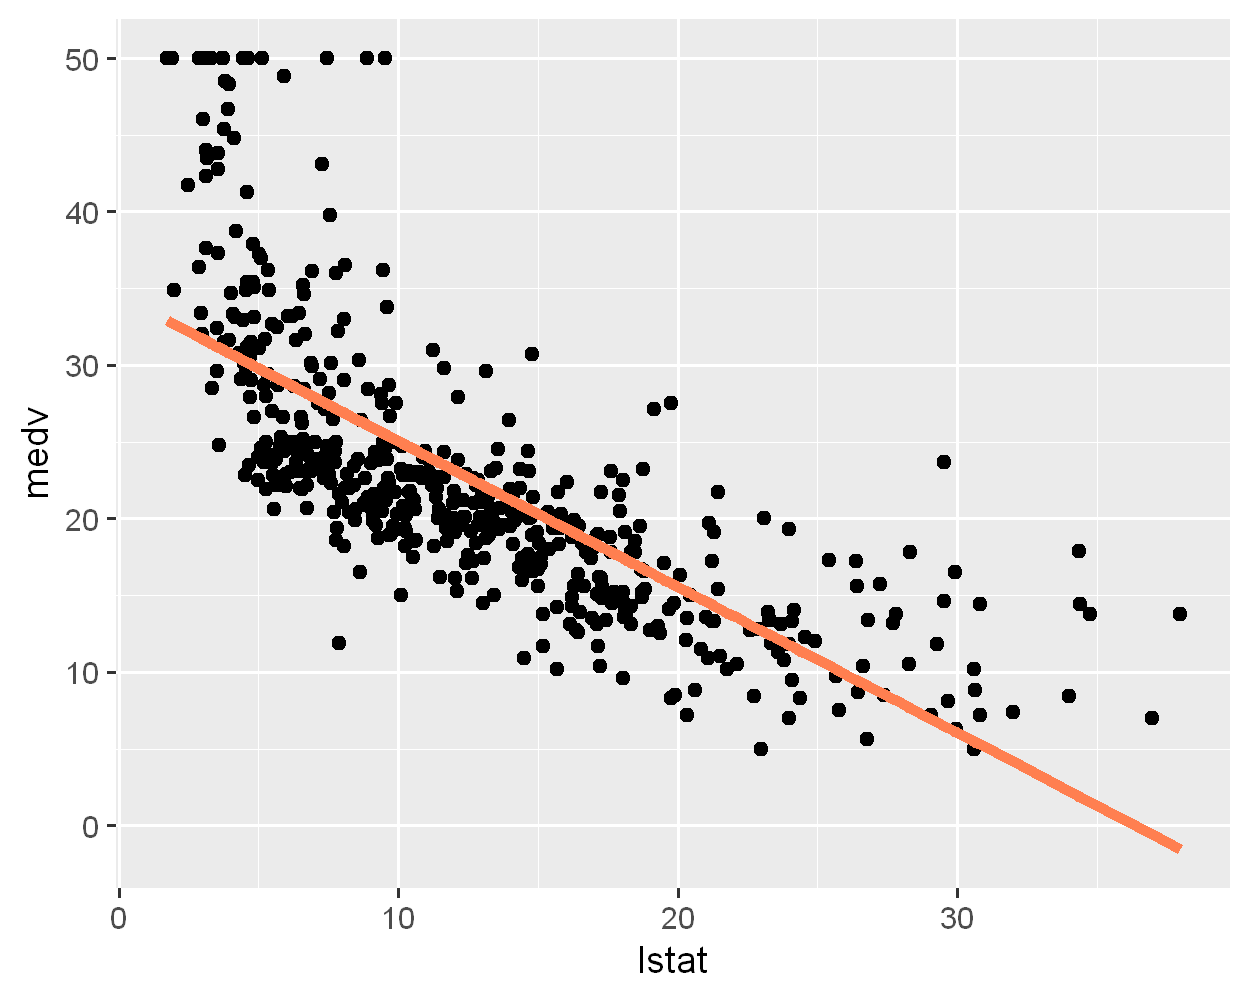

In [18]:
p = ggplot(Boston2, aes(x = lstat)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

***
### Put your skills to practice independently!

In cells below, build a model of `medv` with the `rm` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

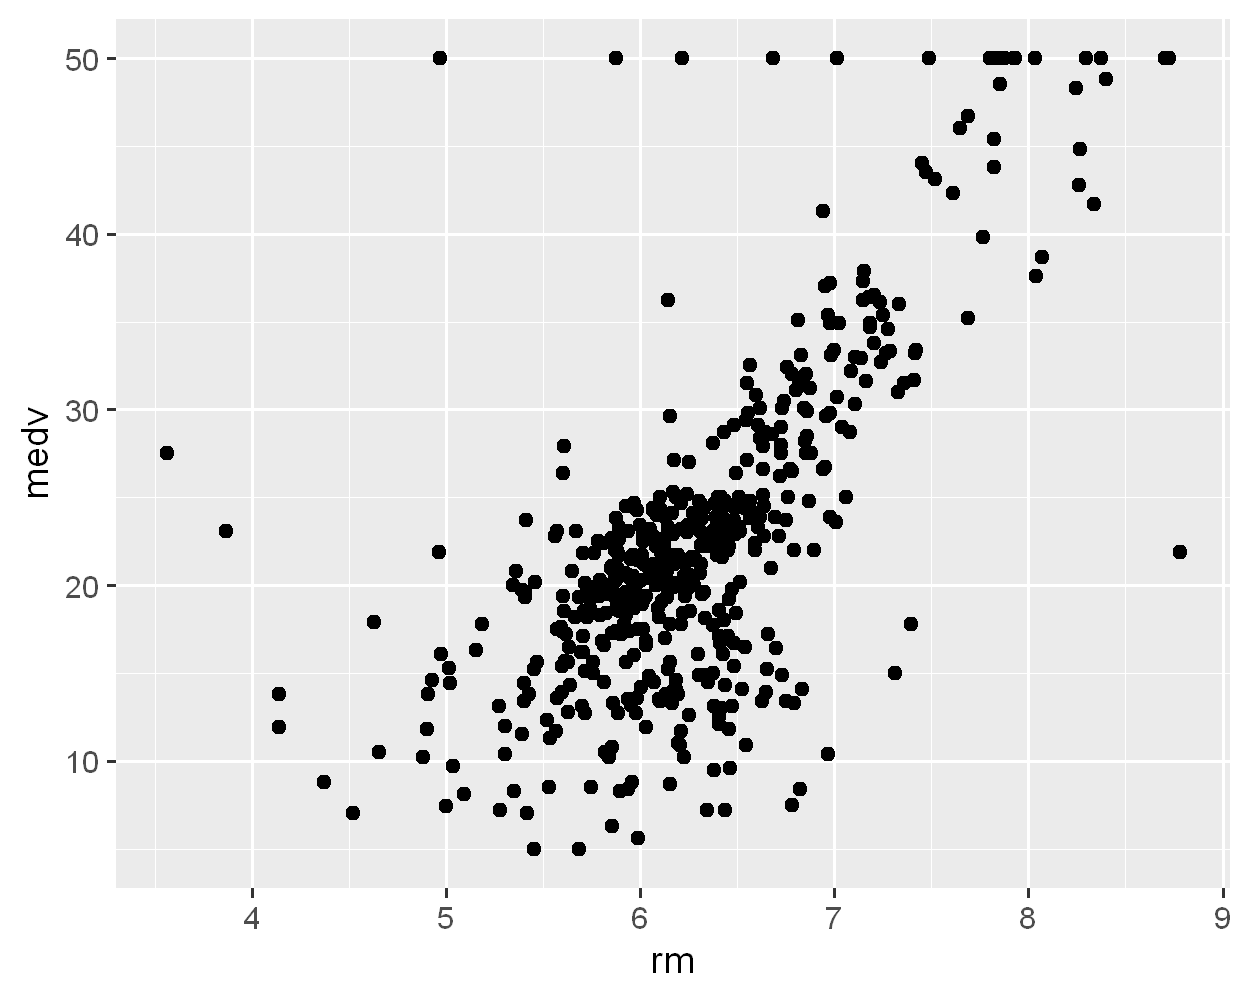

In [2]:
# Lets visualize the relationship between the avg number of rooms and the median value of a home
p = ggplot(Boston, aes(x = rm, y = medv)) + geom_point()

p

In [9]:
# Using the linear regression model to predict the median value of a home based on the avg number of rooms
# Use the previous linear mod object
mod_fit_2 = mod |> fit(medv ~ rm, data = Boston)

tidy(mod_fit_2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-34.670621,2.6498030,-13.08423,6.950229e-34
rm,9.102109,0.4190266,21.72203,2.487229e-74


In [10]:
Boston3 = augment(mod_fit_2, Boston)

glimpse(Boston3)

Rows: 506
Columns: 15
$ .pred   <dbl> 25.17575, 23.77402, 30.72803, 29.02594, 30.38215, 23.85594, 20…
$ .resid  <dbl> -1.1757458, -2.1740210, 3.9719677, 4.3740621, 5.8178479, 4.844…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

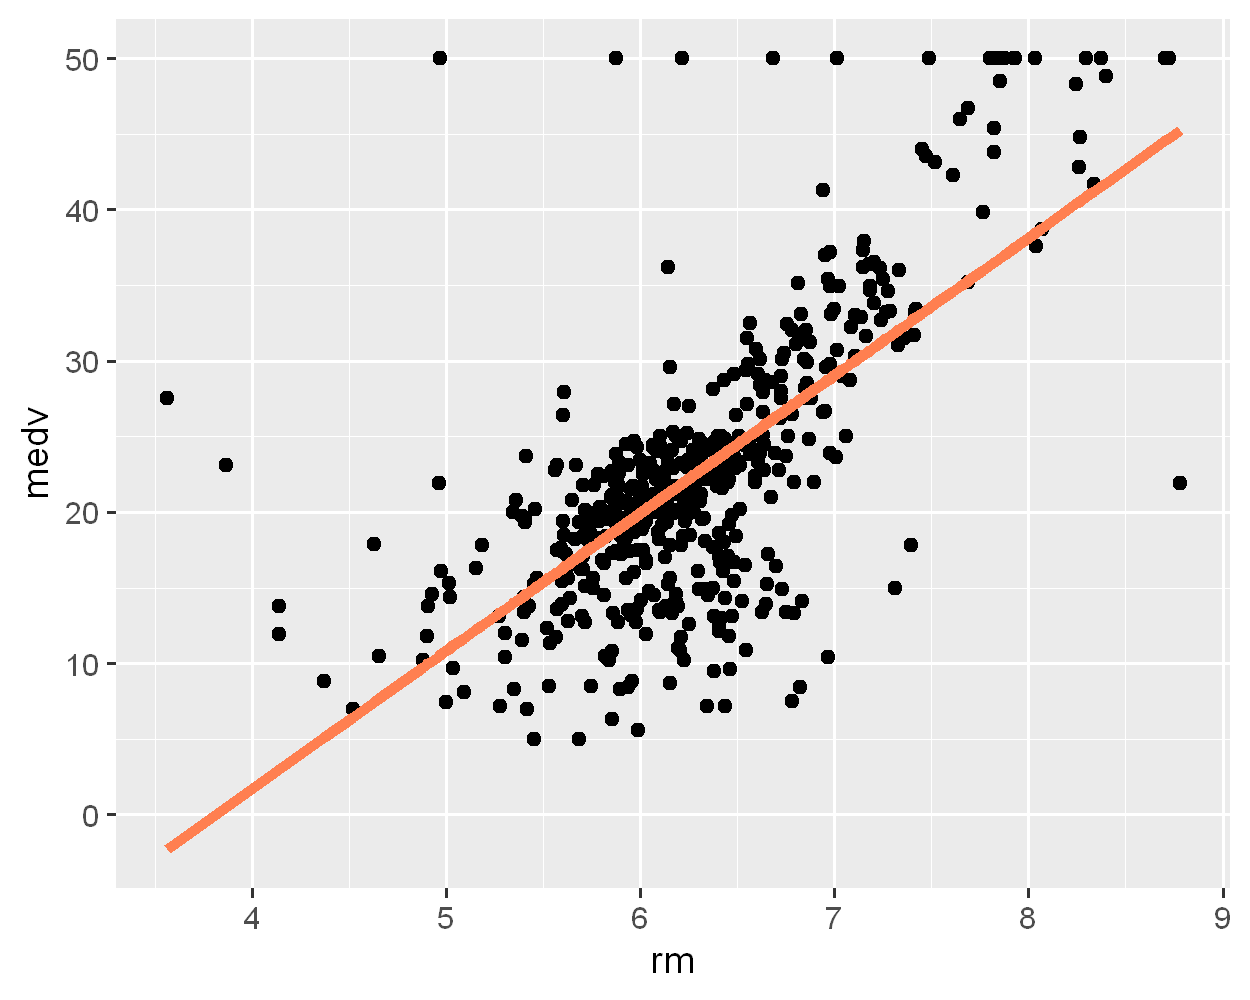

In [11]:
p = ggplot(Boston3, aes(x = rm)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

❓Does your model indicate a positive relationship beteen number of rooms and home value? 

**Answer:**

Yes, as you would expect, as the average number of rooms in the home increases, so does the value of the home.

***
## Linear model with one categorical variable

We will use the `Carseats` data from the `ISLR2` package for the following exercise.

In [12]:
Carseats |> glimpse()

Rows: 400
Columns: 11
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct> Yes, Yes, Yes, Yes, No, Yes, No, Yes, No, Yes, Yes, Yes, N…


Below is a plot of `sales` versus `ShelveLoc`.

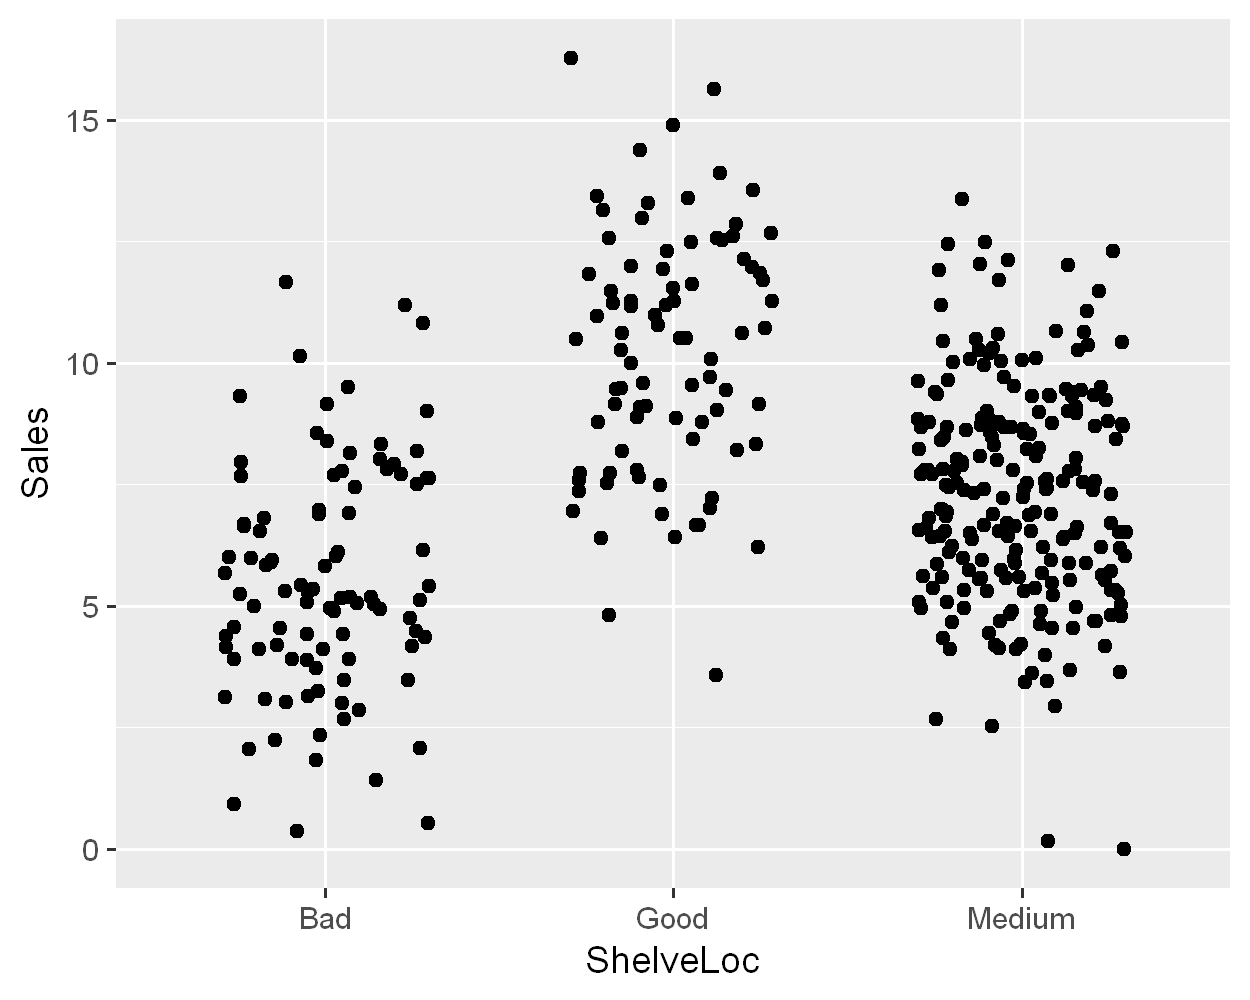

In [13]:
p = ggplot(Carseats, aes(x = ShelveLoc, y = Sales)) + 
    geom_point(position = position_jitter(width = 0.3, height = 0))

p

In [30]:
mod_fit_good = mod |> fit(Sales ~ ShelveLoc, data = Carseats)

tidy(mod_fit_good)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.522917,0.2387665,23.131038,1.408290e-75
ShelveLocGood,4.691083,0.3484201,13.463872,2.678712e-34
ShelveLocMedium,1.783659,0.2863562,6.228811,1.198905e-09


❓Does it look like a "Good" shelf location is associated with more car seat sales?

**Answer:**

As indicated by the graph, there is visually a higher amount of sales associate with a good shelve location. The tabular data supports this a with a numerically lower `p.value` for 'good' category over 'medium'. However, the coorelation between a bad shelve location is actually stronger with the number of sales. Implying people are more likely to NOT purchase a seat because of it's shelf location. 

***
In cells below, using the `Carseats` data build a model of `Sales` with the `ShelveLoc` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

📊 *Here is some example code for plotting your model.*

```r
# The code below assumes your predictions column is called ".pred" and is in a
# data frame called "Carseats2"

ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

```

In [45]:
glance(mod_fit_good)

tidy(mod_fit_good)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3172357,0.3137961,2.339424,92.22991,1.266936e-33,2,-906.0317,1820.063,1836.029,2172.744,397,400


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.522917,0.2387665,23.131038,1.408290e-75
ShelveLocGood,4.691083,0.3484201,13.463872,2.678712e-34
ShelveLocMedium,1.783659,0.2863562,6.228811,1.198905e-09


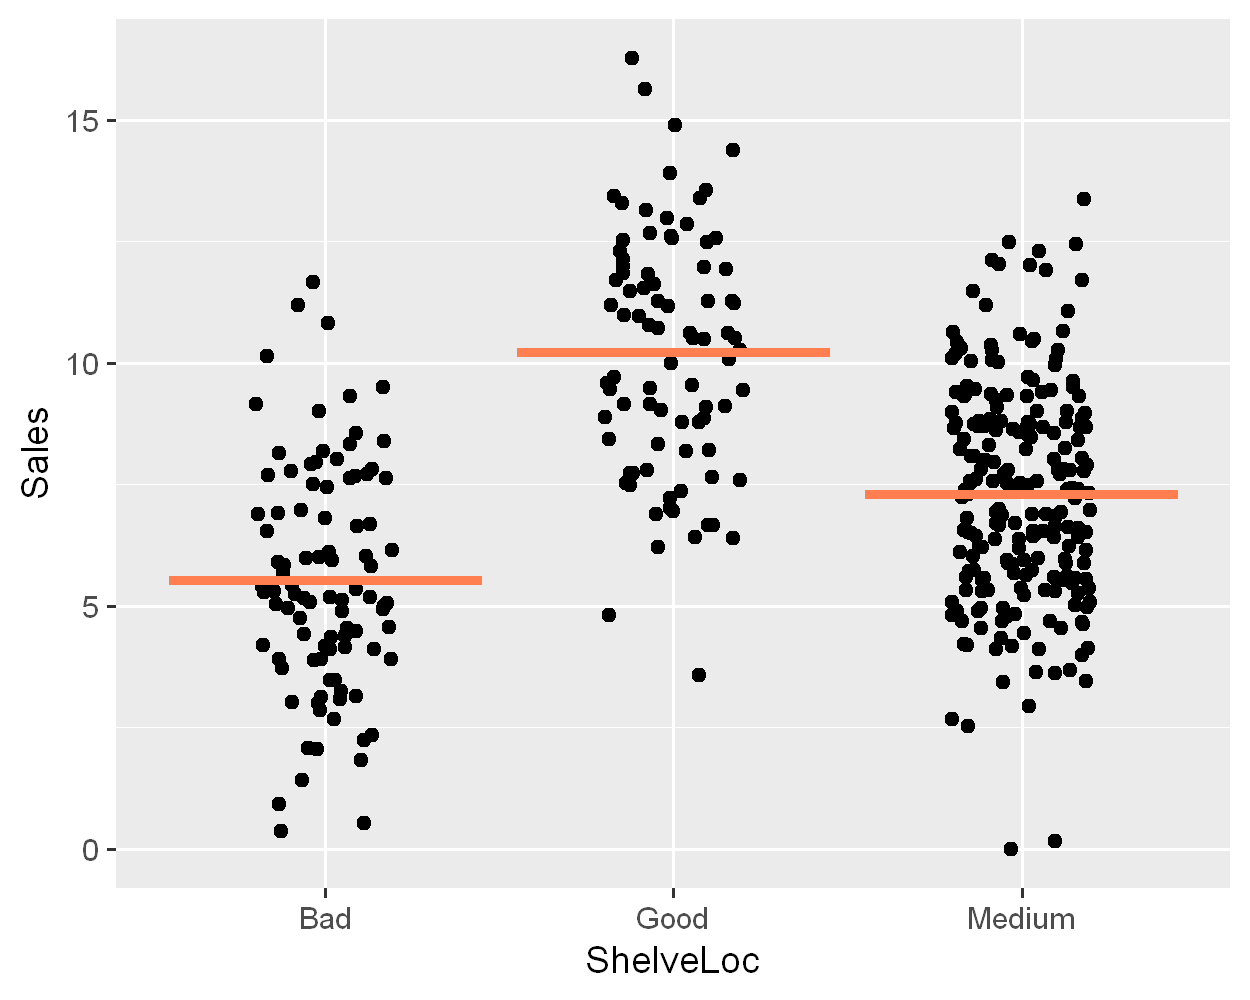

In [36]:


ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

Which `ShelveLoc` category does your intercept term represent? 

**Answer:**

Since 'ShelveLoc' is a categorical variable with categories like "Bad", "Medium", and "Good", the regression model will typically include dummy variables for these categories (`ShelveLocGood`,`ShelveLocMedium`). 

The intercept term will represent the expected value of the dependent variable when all dummy variables (including those for ShelveLoc) are zero, which usually corresponds to the **reference category** (often the *first category* in alphabetical order or the one chosen as the baseline).

In this case, this value would represent `Bad` as it is the first category in alphabetical order. 